### Check if the dominant fast wave is trapped

We want to know if the fast, barotropic wave of high frequency that dominates the SSH response induced by the bay everywhere is trapped to the coast or just a plain gravity wave.

Let's check if there is a "trapping distance" by looking at ssh transects along lon.

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [3]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [4]:
nx = 512
ny = 612
nz = 100
nt = 720

In [5]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

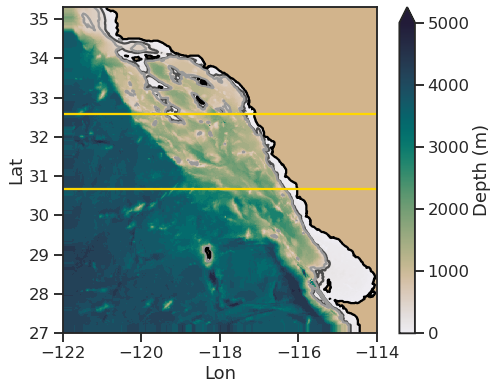

In [6]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,dep_maskedSVB,
                   vmin=0, vmax=5000, cmap=cmo.cm.rain)
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])
ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

yind = 270
yind2 = 410
ax.axhline(lat[yind], color='gold')
ax.axhline(lat[yind2], color='gold')

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)

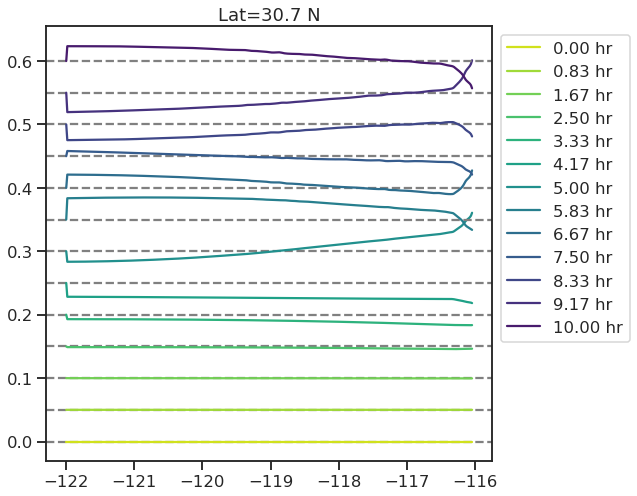

In [6]:
sns.set_palette('viridis_r',13)
fig, ax = plt.subplots(1,1, figsize=(8,8))
offset = 0
for tt in range(0,65,5):
    ssh = np.ma.masked_array(ds.ETAN[tt,yind,:]-ds2.ETAN[tt,yind,:], mask=mask[0,yind,:])
    ax.axhline(offset, color='0.5', linestyle='--')
    ax.plot(lon,(ssh*100)+offset, label='%1.2f hr' %(tt*600/3600))
    offset = offset+.05
ax.legend(bbox_to_anchor=(1,1))    
ax.set_title('Lat=%1.1f N' %lat[yind])
plt.show()

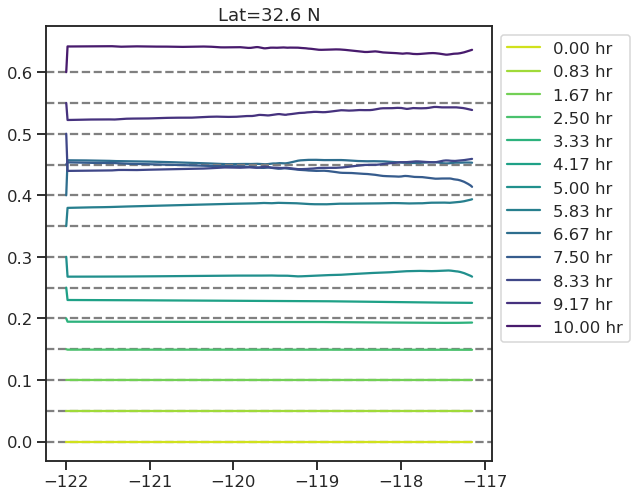

In [7]:
sns.set_palette('viridis_r',13)
fig, ax = plt.subplots(1,1, figsize=(8,8))
offset = 0
for tt in range(0,65,5):
    ssh = np.ma.masked_array(ds.ETAN[tt,yind2,:]-ds2.ETAN[tt,yind2,:], mask=mask[0,yind2,:])
    ax.axhline(offset, color='0.5', linestyle='--')
    ax.plot(lon,(ssh*100)+offset, label='%1.2f hr' %(tt*600/3600))
    offset = offset+.05
ax.legend(bbox_to_anchor=(1,1))    
ax.set_title('Lat=%1.1f N' %lat[yind2])

plt.show()

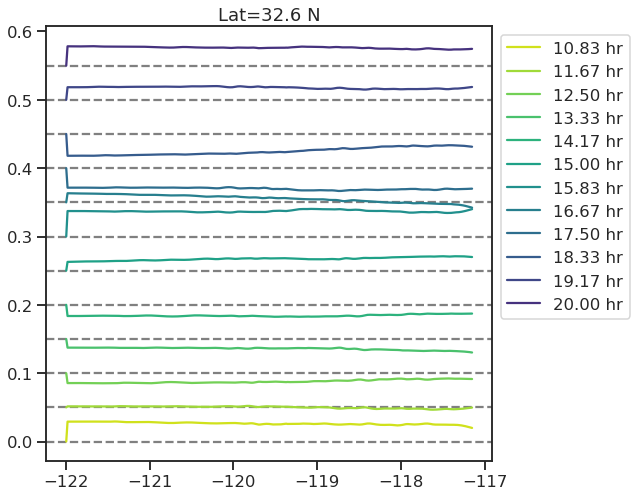

In [8]:
sns.set_palette('viridis_r',13)
fig, ax = plt.subplots(1,1, figsize=(8,8))
offset = 0
for tt in range(65,125,5):
    ssh = np.ma.masked_array(ds.ETAN[tt,yind2,:]-ds2.ETAN[tt,yind2,:], mask=mask[0,yind2,:])
    ax.axhline(offset, color='0.5', linestyle='--')
    ax.plot(lon,(ssh*100)+offset, label='%1.2f hr' %(tt*600/3600))
    offset = offset+.05
ax.legend(bbox_to_anchor=(1,1))    
ax.set_title('Lat=%1.1f N' %lat[yind2])
plt.show()

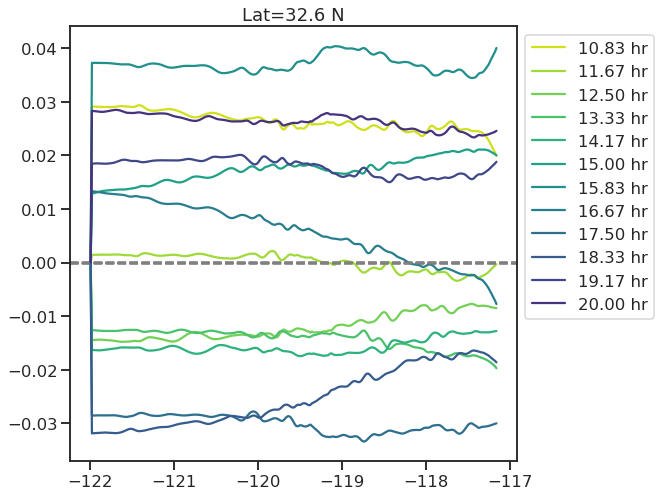

In [9]:
sns.set_palette('viridis_r',13)
fig, ax = plt.subplots(1,1, figsize=(8,8))
for tt in range(65,125,5):
    ssh = np.ma.masked_array(ds.ETAN[tt,yind2,:]-ds2.ETAN[tt,yind2,:], mask=mask[0,yind2,:])
    ax.axhline(0, color='0.5', linestyle='--')
    ax.plot(lon,(ssh*100), label='%1.2f hr' %(tt*600/3600))
ax.legend(bbox_to_anchor=(1,1))  
ax.set_title('Lat=%1.1f N' %lat[yind2])

plt.show()

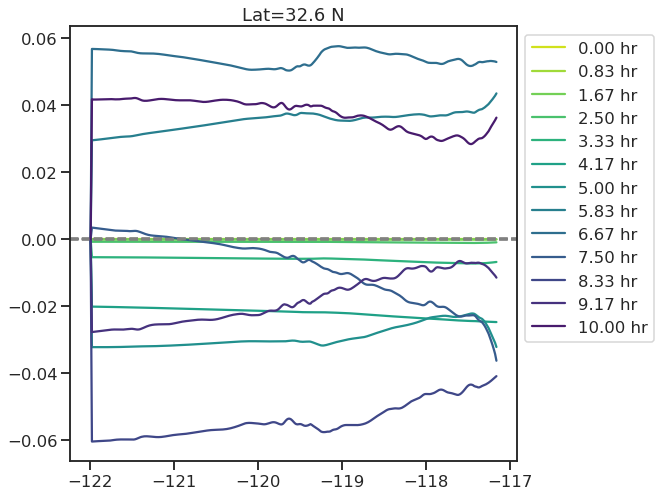

In [10]:
sns.set_palette('viridis_r',13)
fig, ax = plt.subplots(1,1, figsize=(8,8))
for tt in range(0,65,5):
    ssh = np.ma.masked_array(ds.ETAN[tt,yind2,:]-ds2.ETAN[tt,yind2,:], mask=mask[0,yind2,:])
    ax.axhline(0, color='0.5', linestyle='--')
    ax.plot(lon,(ssh*100), label='%1.2f hr' %(tt*600/3600))
ax.legend(bbox_to_anchor=(1,1))    
ax.set_title('Lat=%1.1f N' %lat[yind2])

plt.show()

In [11]:
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

In [51]:
def init():
    tt=0
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(LON,LAT,ssh*100,cmap=cmo.cm.curl,vmin=-0.1, vmax=0.1)
    plt.colorbar(pc, extend='both', label='SSH (cm)',format='%1.1f')
    ax.contour(LON,LAT,ssh*100,levels=[-0.05,0,0.05], colors=['b','0.6','gold'], alpha=0.5)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')
    ax.set_title('%1.1f hr' %(tt/6))
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27,35.3)
    ax.set_aspect=(1)
    return(ax)

def animate(tt, ax):
    print(tt)
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(LON,LAT,ssh*100,cmap=cmo.cm.curl,vmin=-0.1, vmax=0.1)
    
    #plt.colorbar(pc, extend='both')
    ax.contour(LON,LAT,ssh*100,levels=[-0.05,-0.005,0,0.005,0.05], colors=['cyan','b','0.6','coral','gold'], alpha=0.7)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors=['k'])
    ax.contour(lon,lat,depthSVB[:,:], levels=[500], colors=['0.5'],alpha=0.7)
    ax.set_title('%1.1f hr' %(tt/6))
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27,35.3)
    ax.set_aspect(1)
    
    return(ax)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


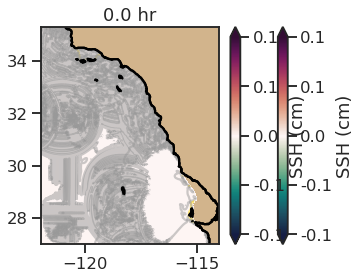

In [97]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.set_facecolor('tan')
    
# Uncomment lines below to run and save animation
anim = animation.FuncAnimation(fig, animate, init_func=init, blit=False,
                               frames=100, repeat=False)
anim.save('gravity_wave_monitoring.mov', writer=writer, dpi=500)    

12


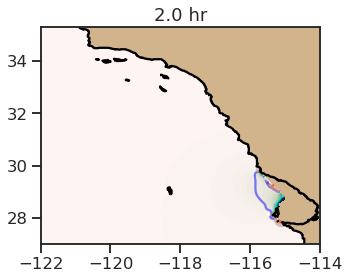

13


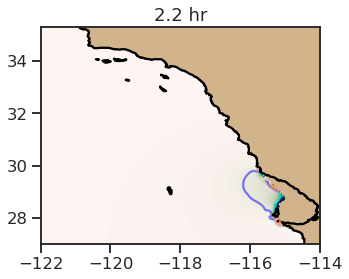

14


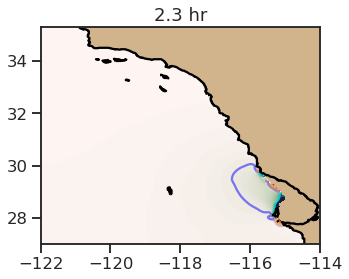

15


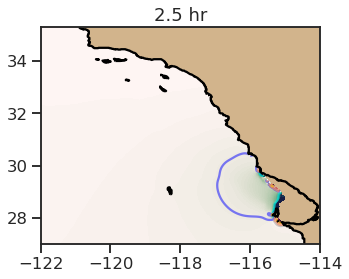

16


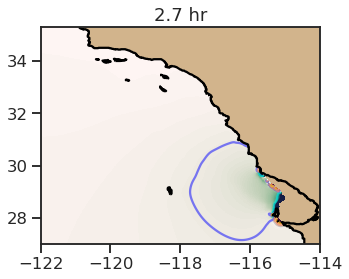

17


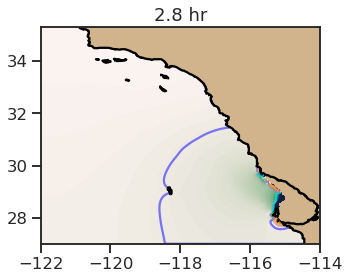

18


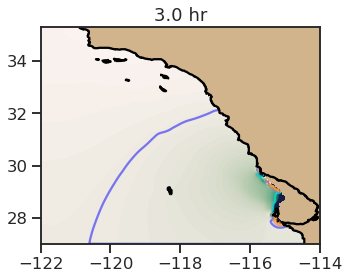

19


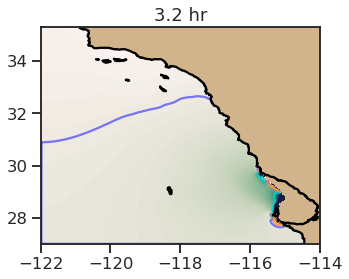

20


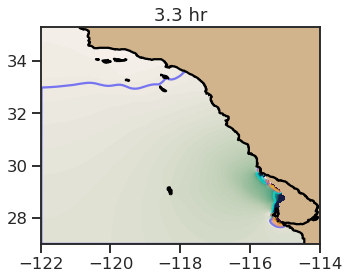

21


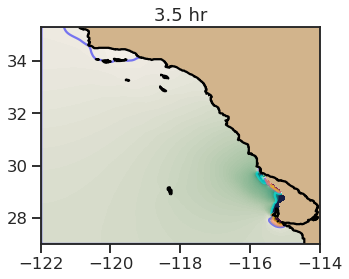

22


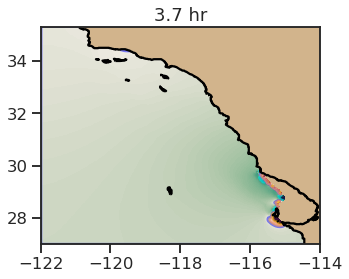

23


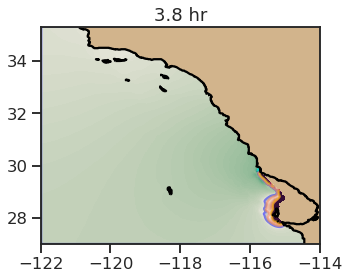

24


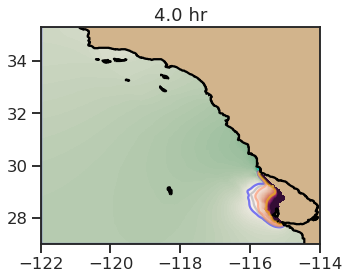

25


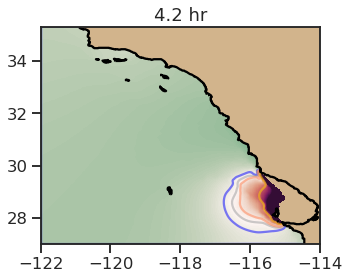

26


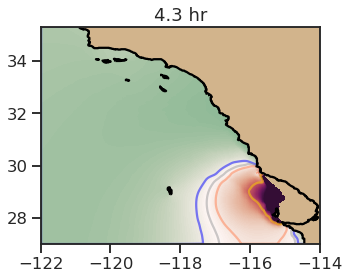

27


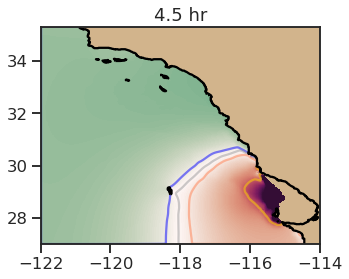

28


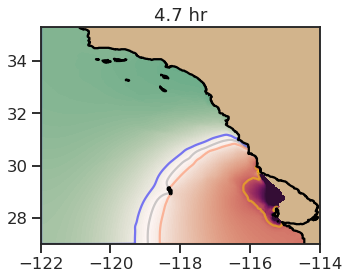

29


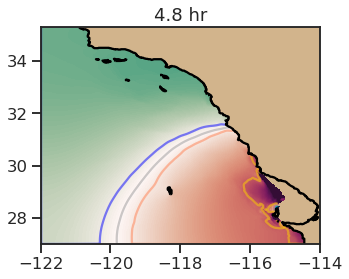

30


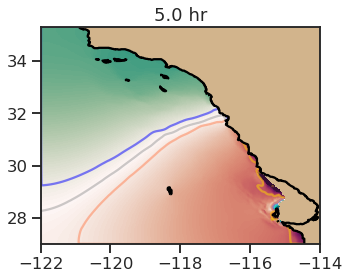

31


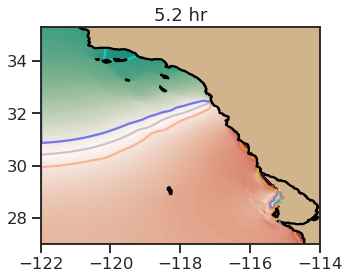

32


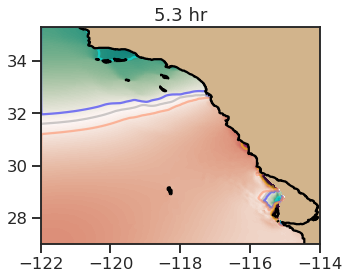

33


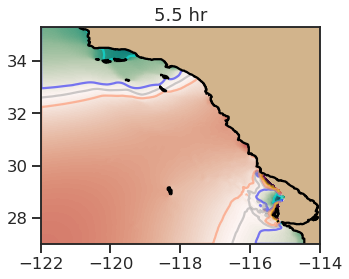

34


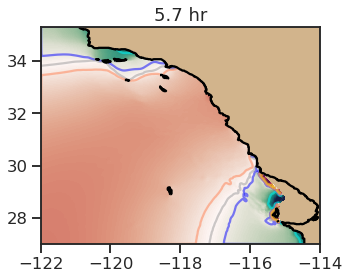

35


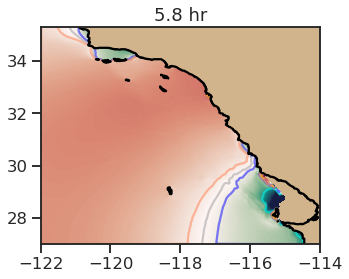

36


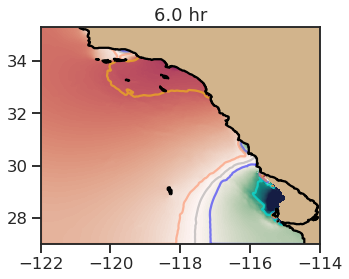

37


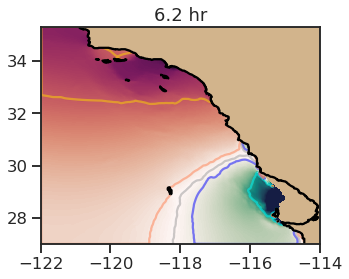

38


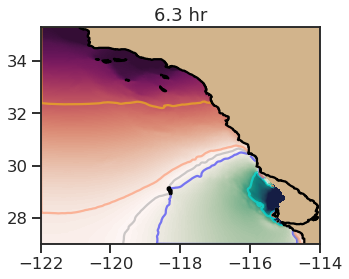

39


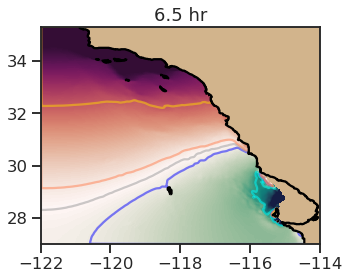

40


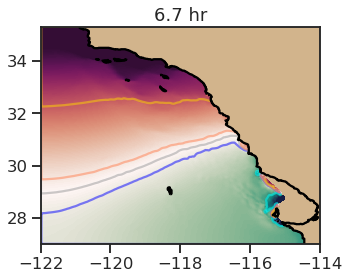

41


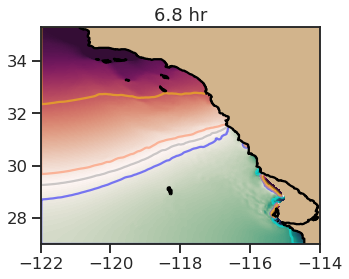

42


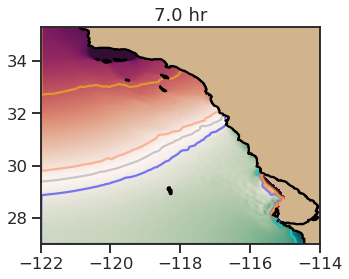

43


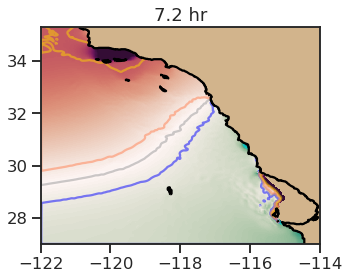

44


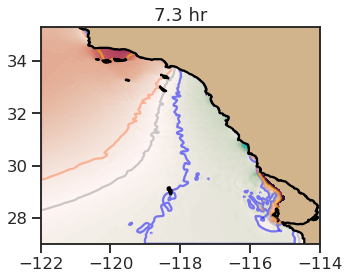

45


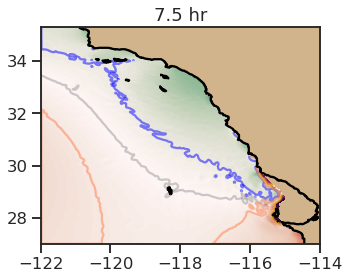

46


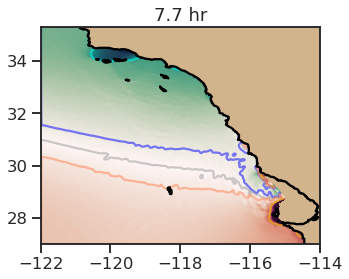

47


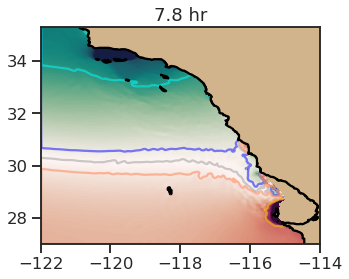

48


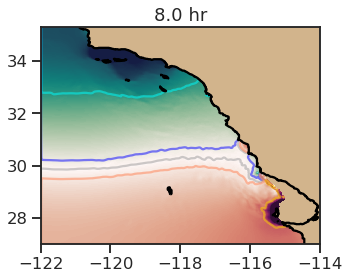

49


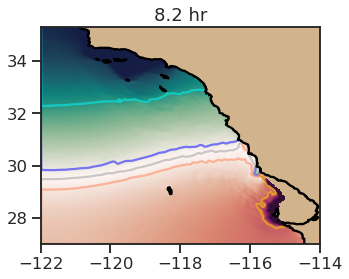

50


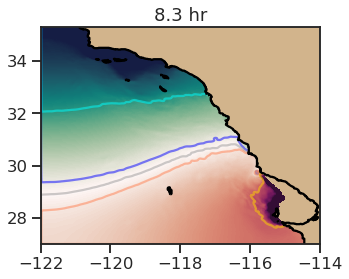

51


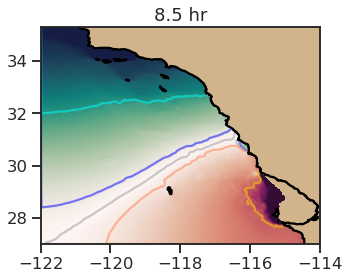

52


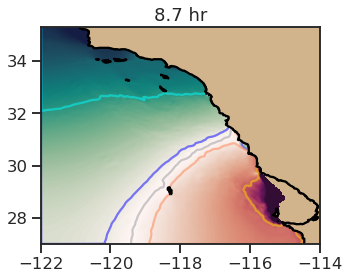

53


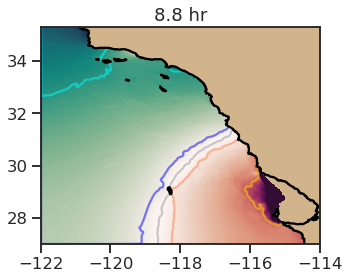

54


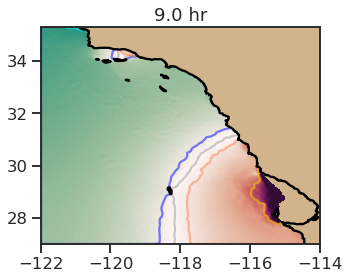

55


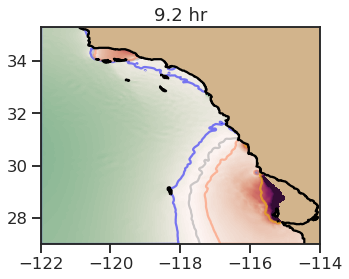

56


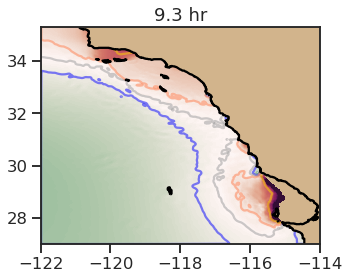

57


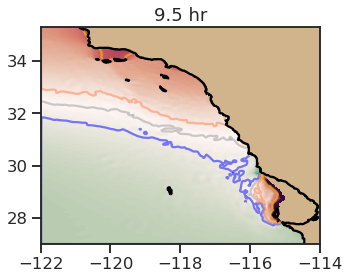

58


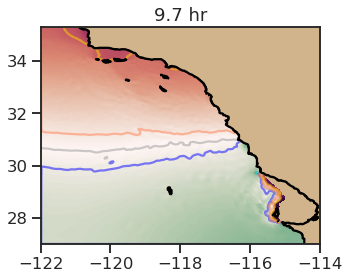

59


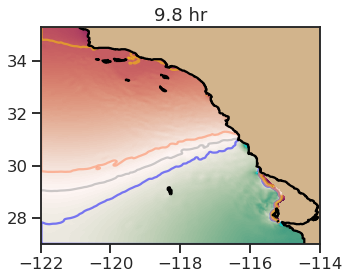

In [18]:
for tt in range(12,60):
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    ax.set_facecolor('tan')
    animate(tt)
    plt.show()

12
13
14
15
16
17
18
19
20
21


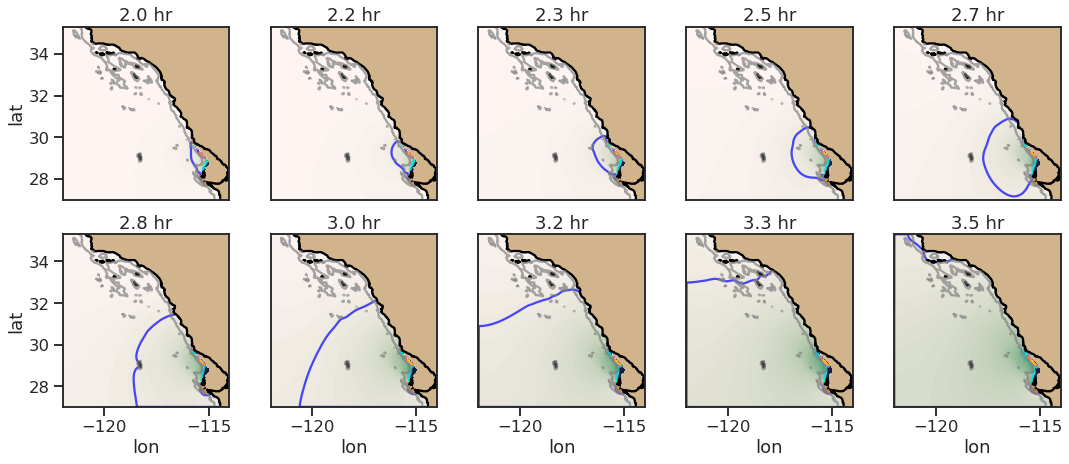

In [52]:
fig, ((ax,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(18,7))
axs = [ax,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for tt, axx in zip(range(12,22), axs):
    axx.set_facecolor('tan')
    animate(tt, axx)

for axx in (ax,ax2,ax3,ax4,ax5):
    axx.set_xticks([])
for axx in (ax6,ax7,ax8,ax9,ax10):
    axx.set_xlabel('lon')
for axx in (ax,ax6):
    axx.set_ylabel('lat')
for axx in (ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10):
    axx.set_yticks([])
plt.show()

12
13
14
15
16
17
18
19
20
21


Text(0.5, 1.0, '2 to 3.5 hr, ssh contour -0.005 cm')

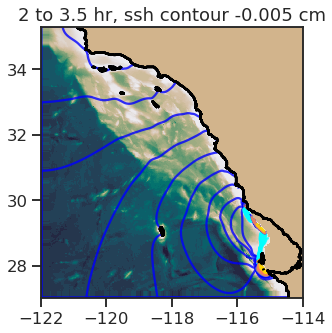

In [53]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_facecolor('tan')

for tt in range(12,22):
    print(tt)
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depthSVB,mask=mask[0,:,:]),cmap=cmo.cm.rain)
    #plt.colorbar(pc, extend='both')
    ax.contour(LON,LAT,ssh*100,levels=[-0.05,-0.005,0,0.005,0.05], colors=['cyan','b','0.6','coral','gold'], alpha=0.8)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27,35.3)
    ax.set_aspect(1)
ax.set_title('2 to 3.5 hr, ssh contour -0.005 cm')

26
27
28
29
30
31
32
33
34
35


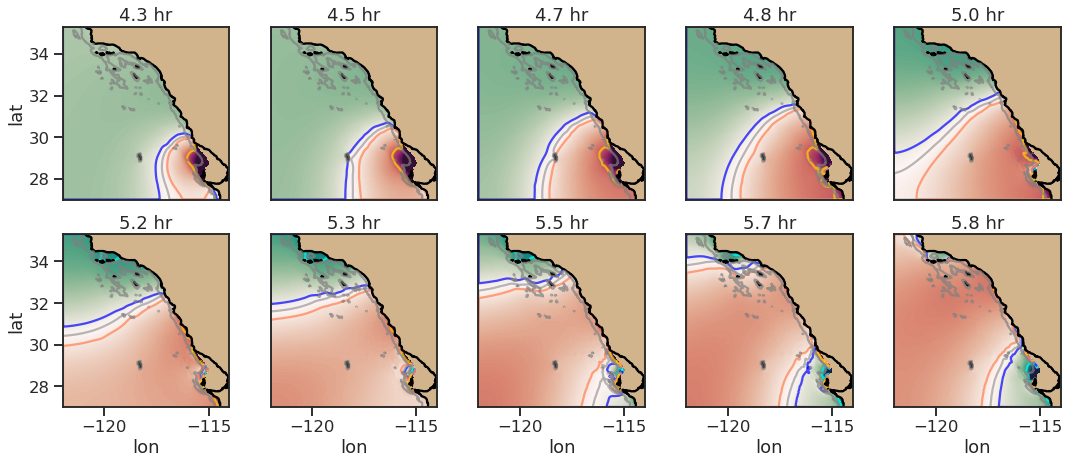

In [54]:
fig, ((ax,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(18,7))
axs = [ax,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for tt, axx in zip(range(26,36), axs):
    axx.set_facecolor('tan')
    animate(tt, axx)

for axx in (ax,ax2,ax3,ax4,ax5):
    axx.set_xticks([])
for axx in (ax6,ax7,ax8,ax9,ax10):
    axx.set_xlabel('lon')
for axx in (ax,ax6):
    axx.set_ylabel('lat')
for axx in (ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10):
    axx.set_yticks([])
plt.show()

26
27
28
29
30
31
32
33
34
35


Text(0.5, 1.0, '4.3 to 5.8 hr, ssh contour 0 cm')

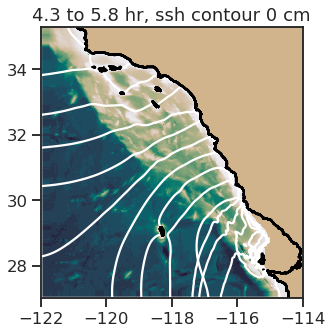

In [55]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_facecolor('tan')

for tt in range(26,36):
    print(tt)
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depthSVB,mask=mask[0,:,:]),cmap=cmo.cm.rain)
    #plt.colorbar(pc, extend='both')
    ax.contour(LON,LAT,ssh*100,levels=[0], colors=['w'], alpha=1)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27,35.3)
    ax.set_aspect(1)
ax.set_title('4.3 to 5.8 hr, ssh contour 0 cm')

33
34
35
36
37
38
39
40
41
42


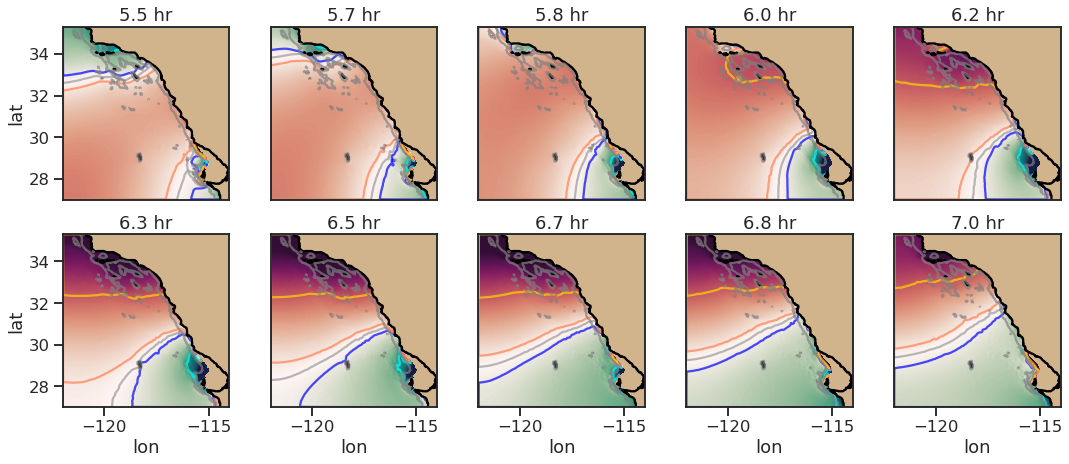

In [57]:
fig, ((ax,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(18,7))
axs = [ax,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for tt, axx in zip(range(33,43), axs):
    axx.set_facecolor('tan')
    animate(tt, axx)

for axx in (ax,ax2,ax3,ax4,ax5):
    axx.set_xticks([])
for axx in (ax6,ax7,ax8,ax9,ax10):
    axx.set_xlabel('lon')
for axx in (ax,ax6):
    axx.set_ylabel('lat')
for axx in (ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10):
    axx.set_yticks([])
plt.show()

37
38
39
40
41
42
43
44
45
46


Text(0.5, 1.0, '5.8 to 7.3 hr, ssh contour 0.05 cm')

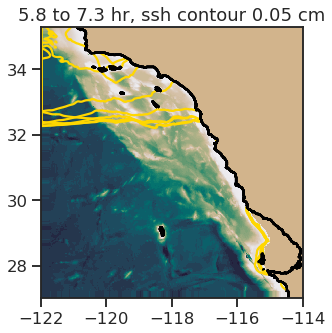

In [58]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_facecolor('tan')

for tt in range(37,47):
    print(tt)
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depthSVB,mask=mask[0,:,:]),cmap=cmo.cm.rain)
    #plt.colorbar(pc, extend='both')
    ax.contour(LON,LAT,ssh*100,levels=[0.05], colors=['gold'], alpha=1)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27,35.3)
    ax.set_aspect(1)
ax.set_title('5.8 to 7.3 hr, ssh contour 0.05 cm')

42
43
44
45
46
47
48
49
50
51


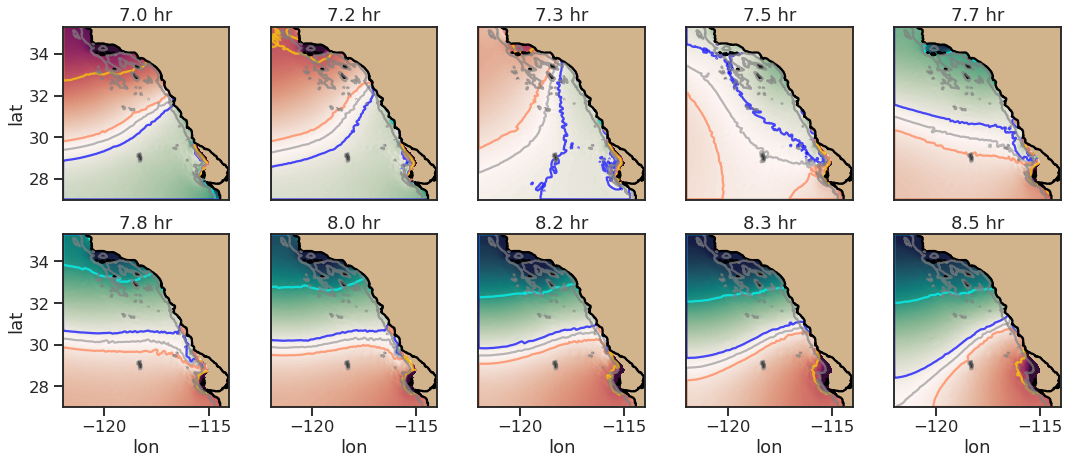

In [59]:
fig, ((ax,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(18,7))
axs = [ax,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for tt, axx in zip(range(42,52), axs):
    axx.set_facecolor('tan')
    animate(tt, axx)

for axx in (ax,ax2,ax3,ax4,ax5):
    axx.set_xticks([])
for axx in (ax6,ax7,ax8,ax9,ax10):
    axx.set_xlabel('lon')
for axx in (ax,ax6):
    axx.set_ylabel('lat')
for axx in (ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10):
    axx.set_yticks([])
plt.show()

52
53
54
55
56
57
58
59
60
61


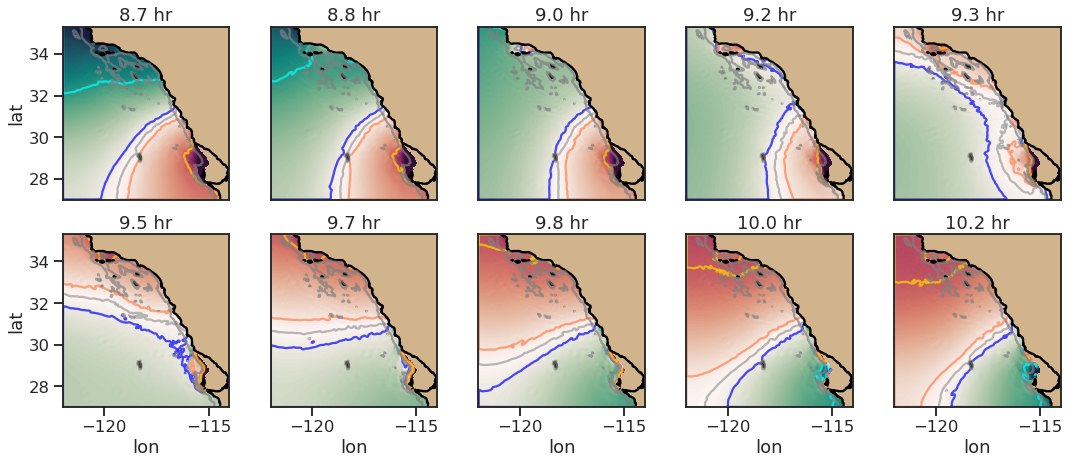

In [60]:
fig, ((ax,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(18,7))
axs = [ax,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for tt, axx in zip(range(52,62), axs):
    axx.set_facecolor('tan')
    animate(tt, axx)

for axx in (ax,ax2,ax3,ax4,ax5):
    axx.set_xticks([])
for axx in (ax6,ax7,ax8,ax9,ax10):
    axx.set_xlabel('lon')
for axx in (ax,ax6):
    axx.set_ylabel('lat')
for axx in (ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10):
    axx.set_yticks([])
plt.show()